Task 1: Exploratory Data Analysis (EDA) and Business Insights




In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [3]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [4]:
# Merge datasets for comprehensive analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [5]:

# Overview of merged dataset
print(merged_df.info())
print(merged_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB
None
       Tran

In [6]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


<ipython-input-7-a1f55fc7f129>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers_df, palette='viridis')


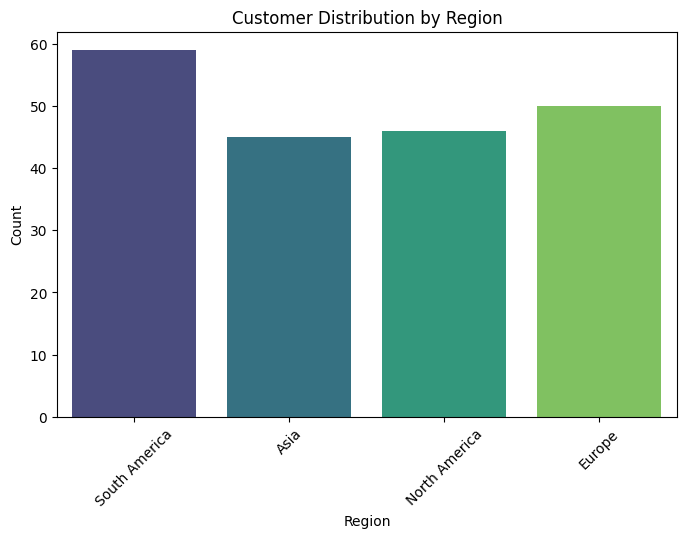

In [7]:
# Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers_df, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-1f1de387ae25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products_df, palette='coolwarm')


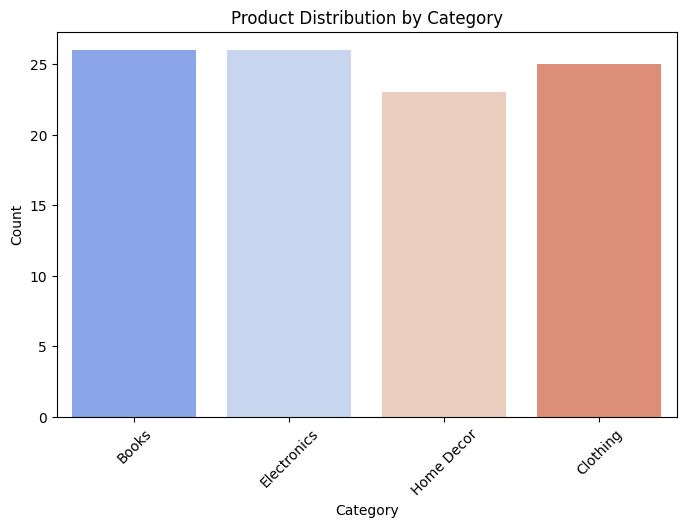

In [8]:
# Product category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=products_df, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

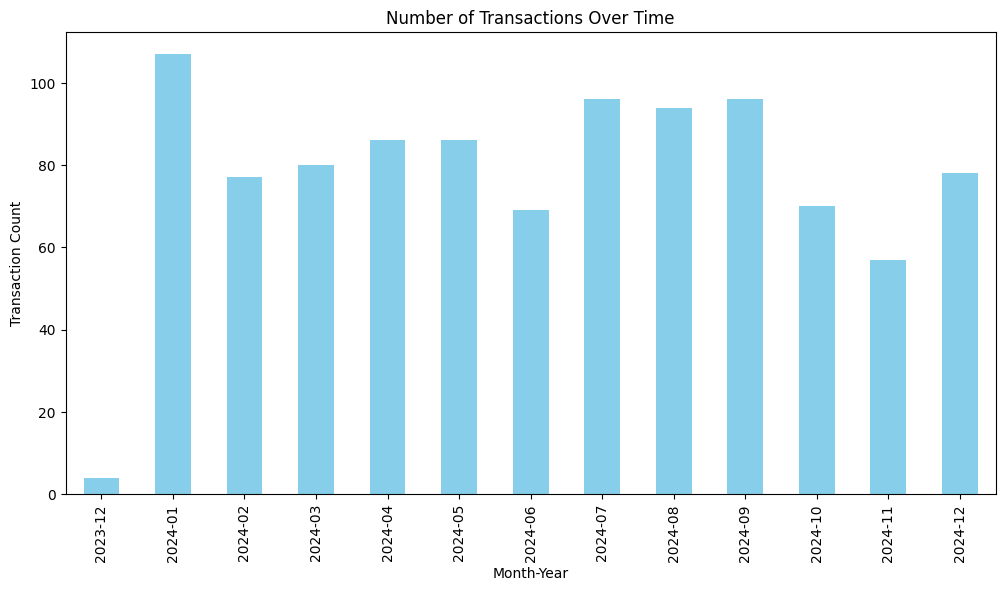

In [9]:
# Transaction trends over time
plt.figure(figsize=(12, 6))
transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M')).size().plot(kind='bar', color='skyblue')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-10-bc679b620f29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=products_df, palette='Set2')


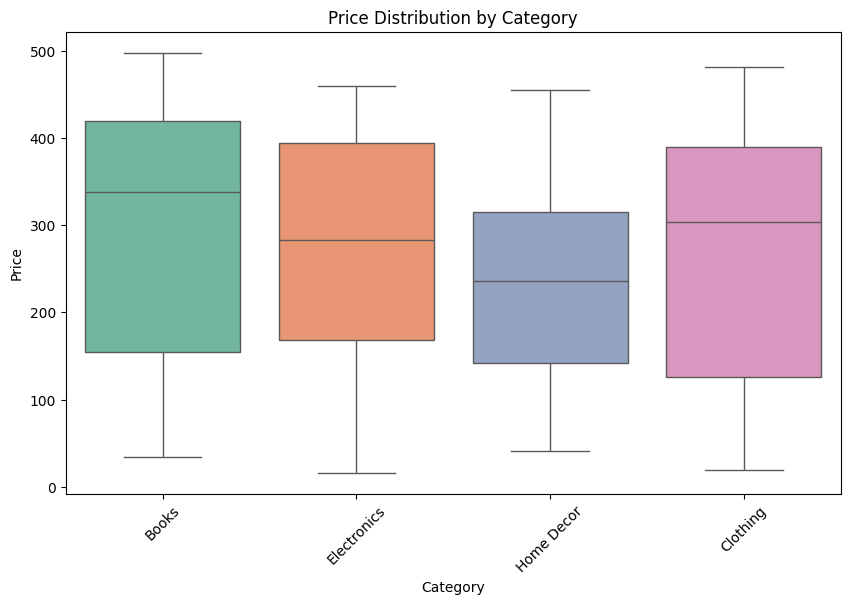

In [10]:
# Price distribution across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=products_df, palette='Set2')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

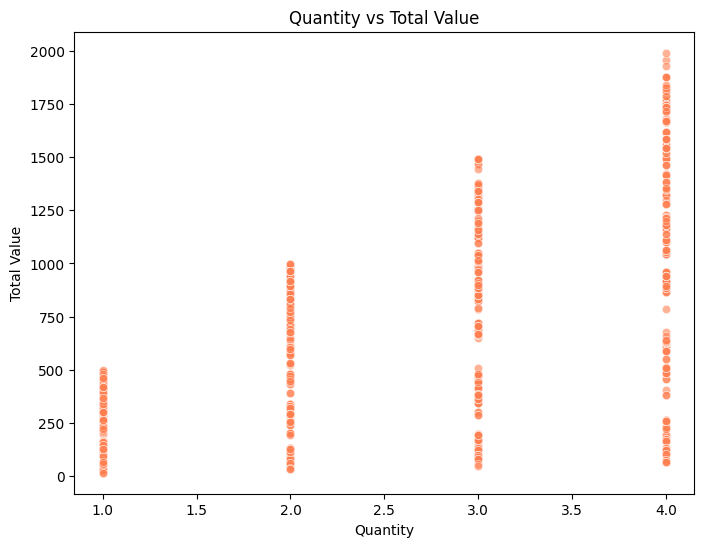

In [11]:
# Quantity vs Total Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions_df, alpha=0.6, color='coral')
plt.title('Quantity vs Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

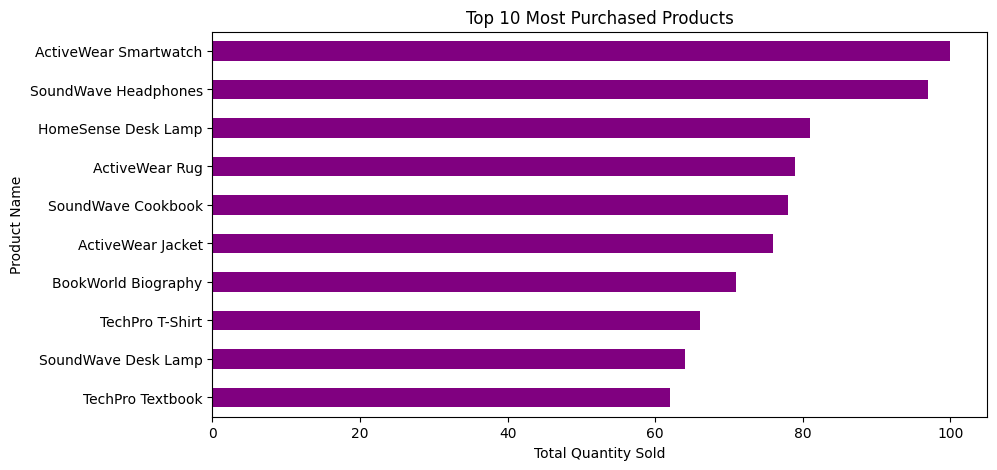

In [12]:
# Most purchased products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='barh', color='purple')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

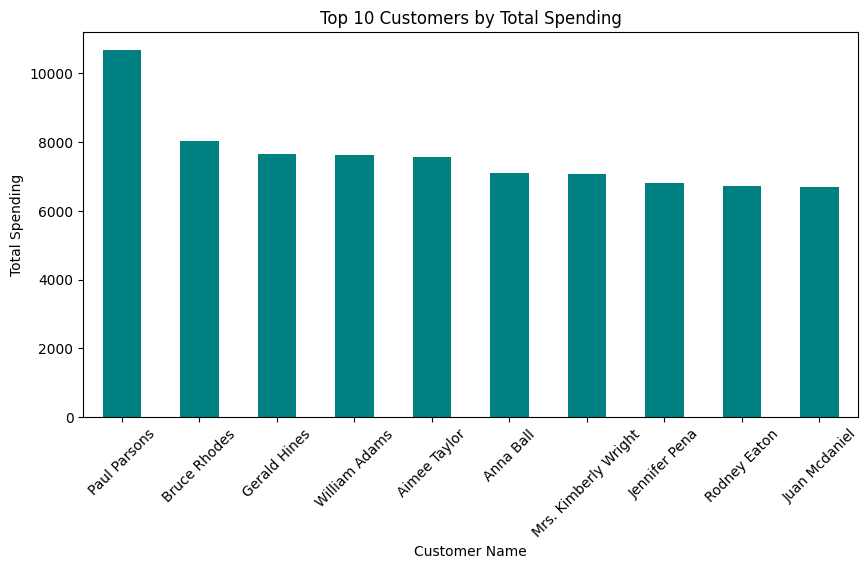

In [13]:
# Customer spending analysis
customer_spending = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
customer_spending.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

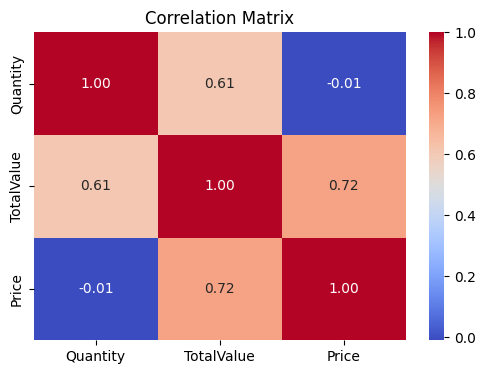

In [14]:
# Correlation analysis
correlation_matrix = transactions_df[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

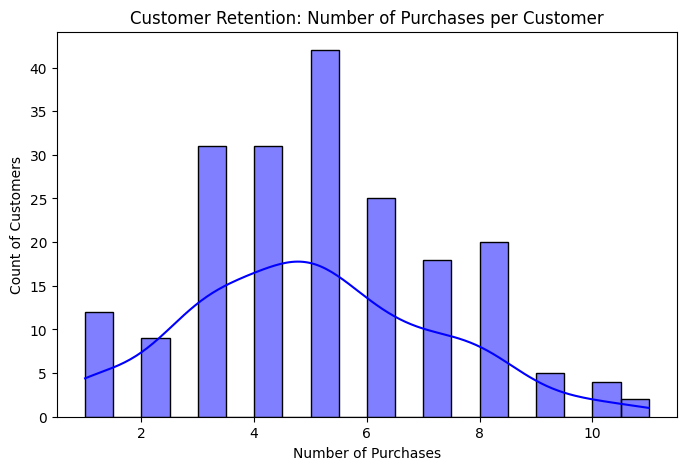

Number of loyal customers (more than 5 purchases): 74


In [15]:
#customer retention analysis
# Count the number of transactions per customer
customer_purchases = merged_df['CustomerID'].value_counts()

# Visualize customer retention distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_purchases, bins=20, kde=True, color='blue')
plt.title('Customer Retention: Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Count of Customers')
plt.show()

# Identify loyal customers with more than a threshold of purchases
loyal_customers = customer_purchases[customer_purchases > 5]
print(f"Number of loyal customers (more than 5 purchases): {len(loyal_customers)}")


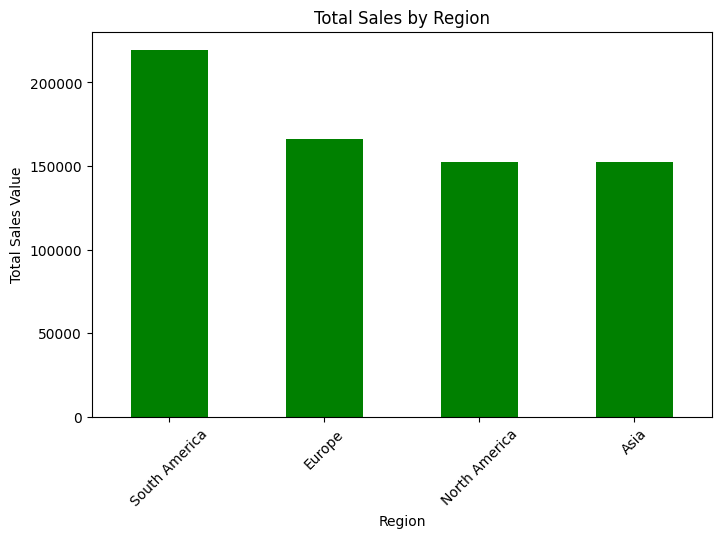

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [16]:
#Regional Sales Performance
# Aggregate total sales by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Visualize sales performance by region
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# Display region-wise revenue distribution
print(region_sales)


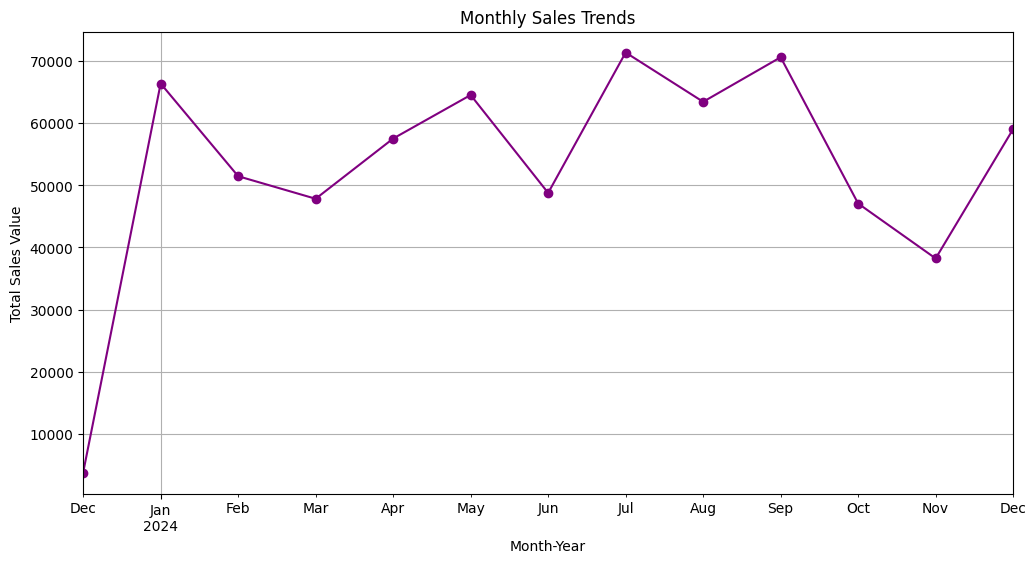

TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [18]:
#Seasonal Sales Trends
# Extract month and year from transaction date
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Aggregate total sales per month
monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()

# Display sales per month
print(monthly_sales)


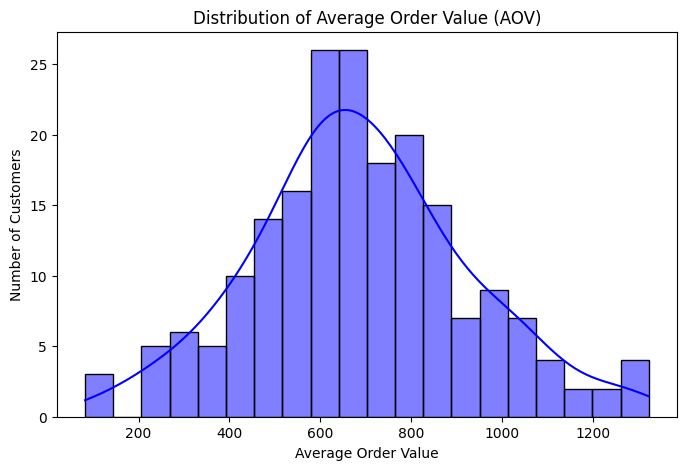

Average AOV: 687.58
Highest AOV: 1323.13
Lowest AOV: 82.36


In [19]:
#Average Order Value (AOV) Analysis
# Calculate AOV (Total Value / Number of Orders per Customer)
aov_per_customer = merged_df.groupby('CustomerID')['TotalValue'].sum() / merged_df.groupby('CustomerID')['TransactionID'].count()

# Visualize AOV distribution
plt.figure(figsize=(8, 5))
sns.histplot(aov_per_customer, bins=20, kde=True, color='blue')
plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.show()

# Display AOV statistics
print(f"Average AOV: {aov_per_customer.mean():.2f}")
print(f"Highest AOV: {aov_per_customer.max():.2f}")
print(f"Lowest AOV: {aov_per_customer.min():.2f}")


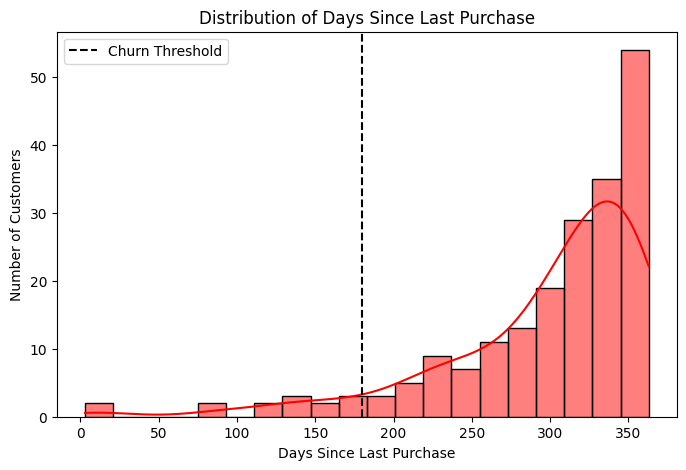

Total customers at risk of churn: 185
CustomerID
C0040    363
C0017    363
C0081    363
C0161    362
C0133    362
C0154    362
C0093    361
C0156    361
C0051    360
C0173    360
Name: DaysSinceLastPurchase, dtype: int64


In [20]:
#Churn Risk Analysis
# Calculate days since last purchase for each customer
latest_date = merged_df['TransactionDate'].max()
merged_df['DaysSinceLastPurchase'] = (latest_date - merged_df['TransactionDate']).dt.days

# Identify potentially churned customers (e.g., those inactive for more than 180 days)
churn_risk_customers = merged_df.groupby('CustomerID')['DaysSinceLastPurchase'].max()
churned_customers = churn_risk_customers[churn_risk_customers > 180]

# Visualize churn risk distribution
plt.figure(figsize=(8, 5))
sns.histplot(churn_risk_customers, bins=20, kde=True, color='red')
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.axvline(180, color='black', linestyle='--', label='Churn Threshold')
plt.legend()
plt.show()

# Display churn risk data
print(f"Total customers at risk of churn: {len(churned_customers)}")
print(churned_customers.sort_values(ascending=False).head(10))
